<a href="https://colab.research.google.com/github/deepenmi/tutorials/blob/master/Preceptrons_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Dataset

In [0]:
import torch
from sklearn import datasets
import torch.nn as nn

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
n_pts = 100
centers = [[-0.5,0.5],[0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))


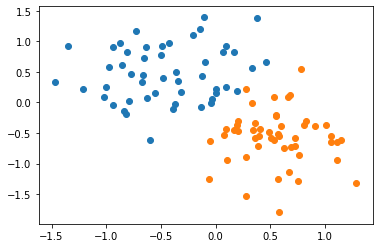

In [4]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred


In [6]:
torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
[w,b] = model.parameters()
w1,w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())


In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1,x2,'r')
  scatter_plot()


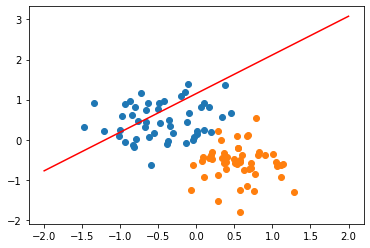

In [9]:
plot_fit('Initial_model')

In [0]:
criterion = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [11]:
epochs = 20000 # epoch - single pass thorough entire datasets
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("Epochs:", i, "Loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epochs: 0 Loss: 0.6185115575790405
Epochs: 1 Loss: 0.6174639463424683
Epochs: 2 Loss: 0.6164201498031616
Epochs: 3 Loss: 0.6153794527053833
Epochs: 4 Loss: 0.614342451095581
Epochs: 5 Loss: 0.6133086681365967
Epochs: 6 Loss: 0.6122783422470093
Epochs: 7 Loss: 0.6112515330314636
Epochs: 8 Loss: 0.6102280616760254
Epochs: 9 Loss: 0.6092080473899841
Epochs: 10 Loss: 0.6081910729408264
Epochs: 11 Loss: 0.6071775555610657
Epochs: 12 Loss: 0.606167733669281
Epochs: 13 Loss: 0.6051608920097351
Epochs: 14 Loss: 0.604157567024231
Epochs: 15 Loss: 0.6031574606895447
Epochs: 16 Loss: 0.602160632610321
Epochs: 17 Loss: 0.6011670827865601
Epochs: 18 Loss: 0.6001767516136169
Epochs: 19 Loss: 0.599189817905426
Epochs: 20 Loss: 0.5982059240341187
Epochs: 21 Loss: 0.5972254276275635
Epochs: 22 Loss: 0.5962479114532471
Epochs: 23 Loss: 0.5952739119529724
Epochs: 24 Loss: 0.5943028926849365
Epochs: 25 Loss: 0.5933352112770081
Epochs: 26 Loss: 0.5923705101013184
Epochs: 27 Loss: 0.5914090275764465
Epochs:

Text(0.5, 0, 'epoch')

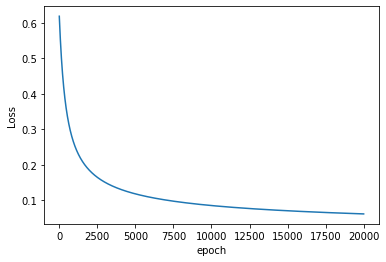

In [12]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

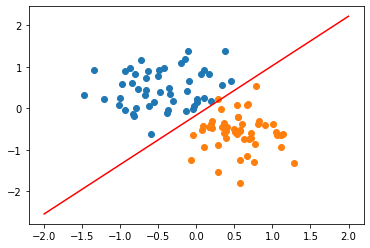

In [13]:
plot_fit('Trained Model')

# Model Testing
